In [ ]:
import torch

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               device: torch.device):

    model.to(device)
    model.eval()

    y_pred = []
    y_true = []

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device) 


            pred_labels = model(X).argmax(dim=1)  

            y_pred.extend(pred_labels.cpu().numpy())  
            y_true.extend(y.cpu().numpy())  

    return y_pred, y_true


In [ ]:
y_pred,y_true=eval_model(model_2, test_data_loader, device)

In [ ]:
y_pred = torch.tensor(y_pred)
y_true = torch.tensor(y_true)

In [ ]:
import torchmetrics

In [ ]:
print(f"f1 score:{torchmetrics.functional.f1_score(y_pred, y_true, task='multiclass', num_classes=10)}")

f1 score:0.984499990940094


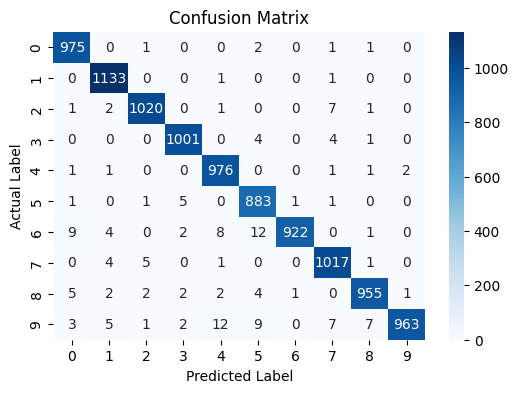

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()